<a href="https://colab.research.google.com/github/easyri/cacheout/blob/master/cache_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pickle 
a_file = open("data.pkl", "rb")
stats = pickle.load(a_file)
print(stats)

{'lru_memoize': {'size': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'timings': [0.0028335, 0.0024824, 0.0021566, 0.0021306999999999993, 0.0024194999999999998, 0.0021259999999999994, 0.0021793999999999997, 0.002066000000000002, 0.0024049000000000015, 0.0022497999999999997], 'hits': [122, 108, 114, 118, 115, 126, 122, 122, 124, 122], 'misses': [38, 52, 46, 42, 43, 40, 38, 38, 38, 38]}, 'lifo_memoize': {'size': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'timings': [0.0018533000000000022, 0.0021259, 0.0019781999999999994, 0.0020542999999999985, 0.0020295000000000035, 0.0021810000000000024, 0.002607099999999994, 0.001985599999999997, 0.0020175000000000054, 0.0019970999999999947], 'hits': [122, 114, 120, 122, 126, 126, 120, 120, 124, 120], 'misses': [38, 52, 38, 38, 38, 38, 38, 38, 38, 38]}, 'fifo_memoize': {'size': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'timings': [0.0018793000000000004, 0.0020999000000000018, 0.002086300000000006, 0.0024874999999999967, 0.001994500000000003, 0.0020142999999999966, 0.002026, 0.00205759

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

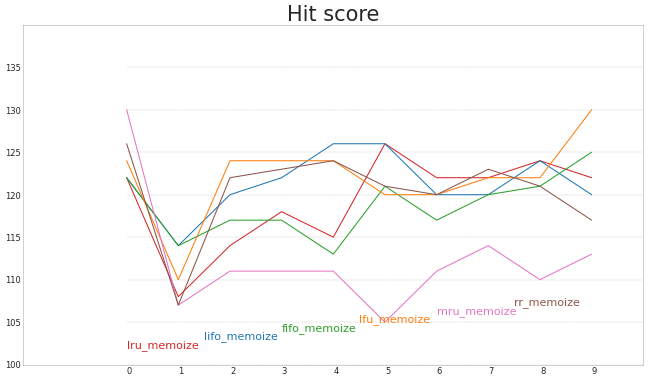

In [44]:
# Import Data

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = 140
y_interval = 5
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink', 'tab:brown']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 50)    

for i, key in enumerate(stats.keys()):
    plt.plot(stats[key]['hits'], lw=1.5, color=mycolors[i]) 
    plt.text(i*1.5, 102+i, s=key, fontsize=16, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Hit score', fontsize=30)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, 10, 1),  horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 10)    
plt.show()

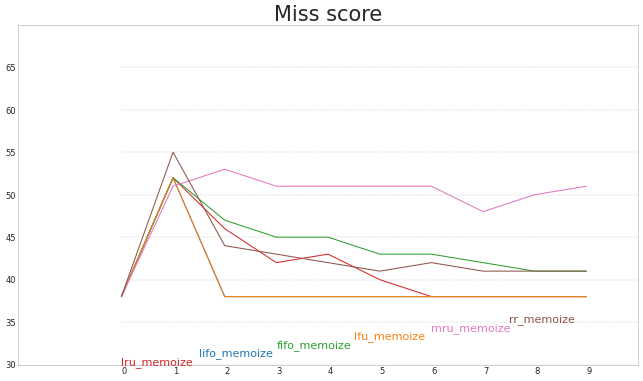

In [45]:
y_LL = 30
y_UL = 70
y_interval = 5
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink', 'tab:brown']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi=50)    

for i, key in enumerate(stats.keys()):
    plt.plot(stats[key]['misses'], lw=1.5, color=mycolors[i]) 
    plt.text(i*1.5, 30+i, s=key, fontsize=16, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Miss score', fontsize=30)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, 10, 1),  horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 10)    
plt.show()

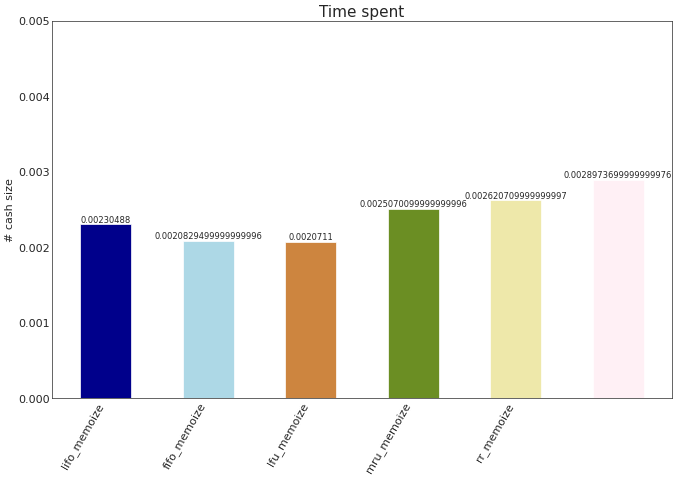

In [85]:
import random
# Prepare Data
# df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = len(stats.keys())
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 50)
count=[]
algo=[]
for key in stats.keys():
  count.append(stats[key]['timings'])
  algo.append(key)
count = np.asarray(count)

plt.bar([j for j in range(len(algo))], [np.mean(count[i]) for i in range(len(algo))], color=c, width=.5)
for i in range(len(algo)):
    val = np.mean(count[i])
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(stats.keys(), rotation=60, horizontalalignment= 'right')
plt.title("Time spent", fontsize=22)
plt.ylabel('# cash size')
plt.ylim(0, .005)
plt.show()

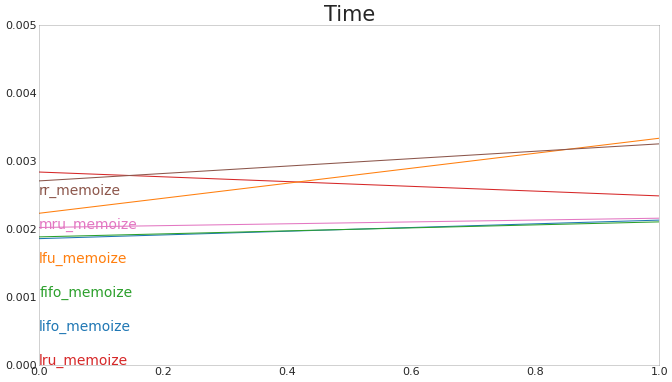

In [111]:
y_LL = 0
y_UL = 0.005
y_interval = 0.001
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink', 'tab:brown']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi=50)    

for i, key in enumerate(stats.keys()):
    plt.plot(stats[key]['timings'], lw=1.5, color=mycolors[i]) 
    plt.text(i*0.00001, 0.0005*i, s=key, fontsize=20, color=mycolors[i])

# Draw Tick lines  
# for y in range(y_LL, y_UL, y_interval):    
#     plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Time', fontsize=30)
# plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
# plt.xticks(range(0, 10, 1),  horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(0, 1)    
plt.show()